<a href="https://colab.research.google.com/github/chaudharygarima29/Machine_learning_projects/blob/main/assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data=pd.read_excel('/content/Book1.xlsx')

In [ ]:
print(data)

         AT      PE
0     14.96  463.26
1     25.18  444.37
2      5.11  488.56
3     20.86  446.48
4     10.82  473.90
...     ...     ...
9563  16.65  460.03
9564  13.19  469.62
9565  31.32  429.57
9566  24.48  435.74
9567  21.60  453.28

[9568 rows x 2 columns]


In [ ]:
print(data.head())

      AT      PE
0  14.96  463.26
1  25.18  444.37
2   5.11  488.56
3  20.86  446.48
4  10.82  473.90


In [ ]:
group_num=17
start_row = (group_num - 1) * 20 + 2
end_row   = group_num * 20 + 1

In [ ]:
start_index=start_row-1
end_index=end_row

In [ ]:
group_data=data.iloc[start_index:end_index].copy()

In [ ]:
print(f"\nGroup {group_num} data (rows {start_row} to {end_row}):")
print(group_data)


Group 17 data (rows 322 to 341):
        AT      PE
321  23.70  436.94
322  16.22  461.06
323  24.75  438.28
324  10.48  472.61
325  29.53  426.85
326  12.59  470.18
327  23.50  455.38
328  29.01  428.32
329   9.75  480.35
330  19.55  455.56
331  21.05  447.66
332  24.72  443.06
333  21.19  452.43
334  10.77  477.81
335  28.68  431.66
336  29.87  431.80
337  22.99  446.67
338  24.66  445.26
339  32.63  425.72
340  31.38  430.58


In [ ]:
X_raw = group_data.iloc[:, 0].values.reshape(-1, 1)
Y_raw = group_data.iloc[:, 1].values.reshape(-1, 1)

In [ ]:
x_min = X_raw.min(axis=0)
x_max = X_raw.max(axis=0)
x = (X_raw - x_min) / (x_max - x_min)
y_norm=(Y_raw-Y_raw.min()/Y_raw.max()-Y_raw.min())

In [ ]:
x_new=np.hstack((np.ones_like(x), x))

In [ ]:
print(x_new)

[[1.         0.6097028 ]
 [1.         0.28277972]
 [1.         0.65559441]
 [1.         0.03190559]
 [1.         0.86451049]
 [1.         0.12412587]
 [1.         0.60096154]
 [1.         0.84178322]
 [1.         0.        ]
 [1.         0.42832168]
 [1.         0.49388112]
 [1.         0.65428322]
 [1.         0.5       ]
 [1.         0.04458042]
 [1.         0.82736014]
 [1.         0.87937063]
 [1.         0.57867133]
 [1.         0.65166084]
 [1.         1.        ]
 [1.         0.94536713]]


In [ ]:
theta_new = np.linalg.inv(x_new.T @ x_new) @ (x_new.T @ Y_raw)

In [ ]:
# Extract the coefficients
theta0_new = theta_new[0, 0]  # intercept
theta1_new = theta_new[1, 0]  # slope

In [ ]:
print("\nClosed-form Linear Regression Parameters:")
print(f"Theta0 (intercept) = {theta0_new:.6f}")
print(f"Theta1 (slope) = {theta1_new:.6f}")


Closed-form Linear Regression Parameters:
Theta0 (intercept) = 477.694599
Theta1 (slope) = -54.082573


In [ ]:
#@ -> matrix multiplication
y_pred=x_new @ theta_new

In [ ]:
plt.figure(figsize=(10,6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

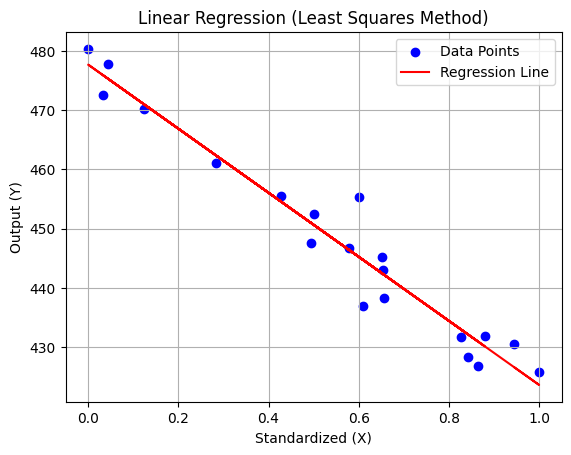

In [ ]:
plt.scatter(x,Y_raw, color='blue', label='Data Points')
plt.plot(x, y_pred, color='red', label='Regression Line')
plt.title('Linear Regression (Least Squares Method)')
plt.xlabel('Standardized (X)')
plt.ylabel('Output (Y)')
plt.legend()
plt.grid(True)
plt.show()

iteration 001:cost=566.997551,b0=4.260546,b1=1.336627


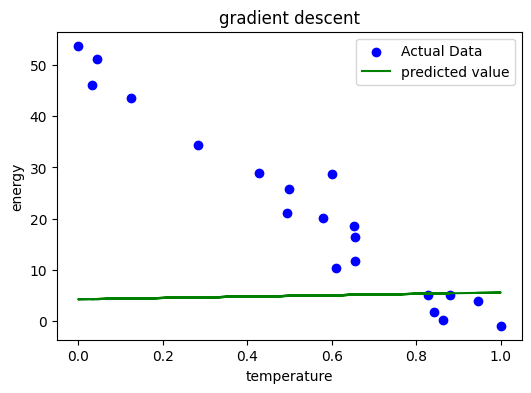

iteration 002:cost=468.447132,b0=7.521755,b1=2.097918


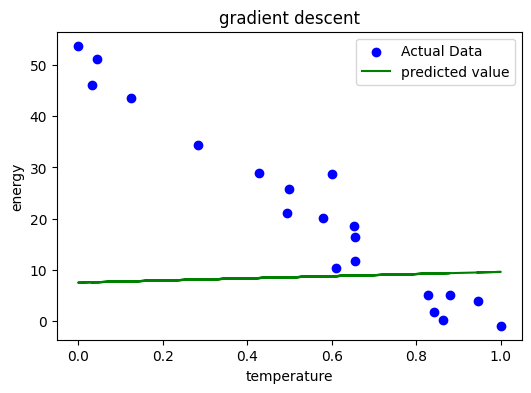

iteration 003:cost=410.890624,b0=10.046867,b1=2.439595


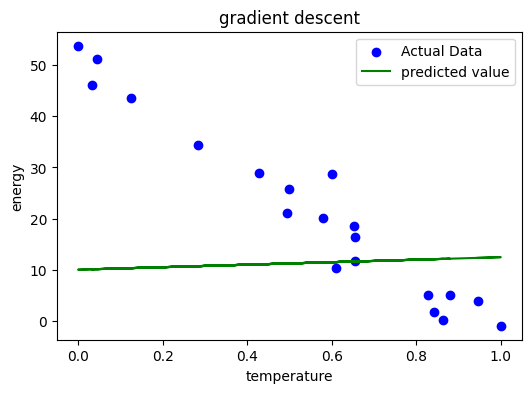

iteration 100:cost=36.124725,b0=42.128250,b1=-38.958724


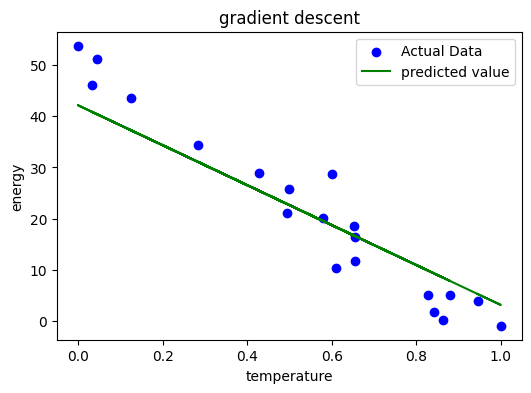

In [ ]:
b0d=0
b1d=0
alpha=0.1
iterations=100
def cost(X,Y,b0,b1):
  n=len(X)
  return(1/n)*np.sum((Y-(b0+b1*x))**2)
cost_history=[]
for i in range(iterations):
  Y_pred=b0d+b1d*x
  db0=-2*np.sum(y_norm-Y_pred)/len(x)
  db1=-2*np.sum((y_norm-Y_pred)*x)/len(x)
  b0d=b0d-alpha*db0
  b1d=b1d-alpha*db1
  c=cost(x,y_norm,b0d,b1d)
  cost_history.append(c)
  if i in [0,1,2,iterations-1]:
    plt.figure(figsize=(6,4))
    print(f"iteration {i+1:03d}:cost={c:.6f},b0={b0d:.6f},b1={b1d:.6f}")
    plt.scatter(x,y_norm,color='blue',label='Actual Data')
    plt.plot(x,b0d+b1d*x,color='green',label="predicted value")
    plt.title('gradient descent')
    plt.ylabel('energy')
    plt.xlabel('temperature')
    plt.legend()
    plt.show()

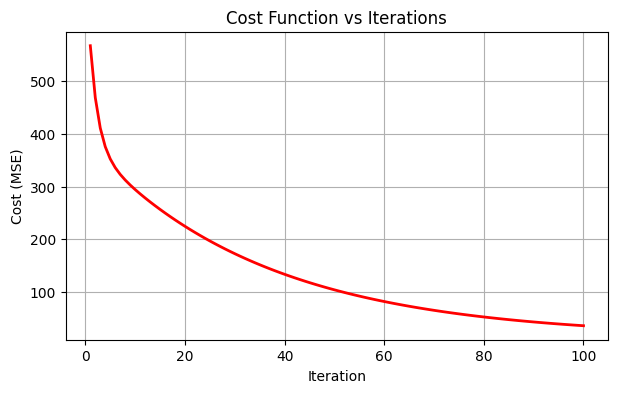

In [ ]:
plt.figure(figsize=(7,4))
plt.plot(range(1, iterations+1), cost_history, color='red', linewidth=2)
plt.title('Cost Function vs Iterations')
plt.xlabel('Iteration')
plt.ylabel('Cost (MSE)')
plt.grid(True)
plt.show()

In [ ]:
# Step 5: Print final regression parameters
print("Final Regression Parameters after last iteration:")
print(f"b0 (intercept) = {b0d:.6f}")
print(f"b1 (slope)     = {b1d:.6f}")
print(f"Final Cost      = {cost_history[-1]:.6f}")

Final Regression Parameters after last iteration:
b0 (intercept) = 42.128250
b1 (slope)     = -38.958724
Final Cost      = 36.124725


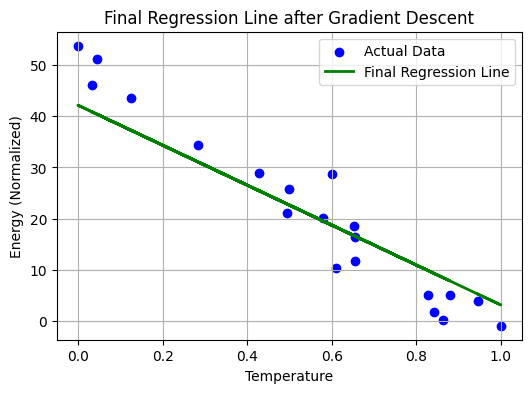

In [ ]:
# Step 6: Plot final regression line
plt.figure(figsize=(6,4))
plt.scatter(x, y_norm, color='blue', label='Actual Data')
plt.plot(x, b0d + b1d * x, color='green', linewidth=2, label='Final Regression Line')
plt.title('Final Regression Line after Gradient Descent')
plt.xlabel('Temperature')
plt.ylabel('Energy (Normalized)')
plt.legend()
plt.grid(True)
plt.show()